In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/upgrad-rise-hackathon/sample_submission.csv
/kaggle/input/upgrad-rise-hackathon/train.csv
/kaggle/input/upgrad-rise-hackathon/test.csv


In [2]:
#Importing train.csv into train dataframe
train = pd.read_csv(r"/kaggle/input/upgrad-rise-hackathon/train.csv",index_col='transactionid')
train.head()

,fraud_flag,Transactiondatetime_insec,Amt_Transaction,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51,W52,W53,W54,W55,W56,W57,W58,W59,W60,W61,W62,W63,W64,W65,W66,W67,W68,W69,W70,W71,W72,W73,W74,W75,W76,W77,W78,W79,W80,W81,W82,W83,W84,W85,W86,W87,W88,W89,W90,W91,W92,W93,W94,W95,W96,W97,W98,W99,V102,V121,V124,V125,V126,V127,V128,V130,V131,V133,V136,V137,V140,V142,V144,V146,V149,V151,V152,V153,V154,V161,V162,V163,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
transactionid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,7171724,151.000,W,18132,567.0,150.0,mastercard,117.0,debit,272.0,87.0,16.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,T,T,M0,F,T,F,F,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,822479,34.000,W,11204,298.0,150.0,visa,226.0,debit,272.0,87.0,7.0,NaN,NaN,NaN,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1

In [3]:
#Importing test.csv into X_test dataframe
X_test = pd.read_csv(r"/kaggle/input/upgrad-rise-hackathon/test.csv",index_col='transactionid')
X_test.head()

,Transactiondatetime_insec,Amt_Transaction,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51,W52,W53,W54,W55,W56,W57,W58,W59,W60,W61,W62,W63,W64,W65,W66,W67,W68,W69,W70,W71,W72,W73,W74,W75,W76,W77,W78,W79,W80,W81,W82,W83,W84,W85,W86,W87,W88,W89,W90,W91,W92,W93,W94,W95,W96,W97,W98,W99,V102,V121,V124,V125,V126,V127,V128,V130,V131,V133,V136,V137,V140,V142,V144,V146,V149,V151,V152,V153,V154,V161,V162,V163,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
transactionid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
364510,10727480,107.95,W,15484,418.0,150.0,visa,226.0,debit,264.0,87.0,5.0,NaN,gmail.com,NaN,2.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,14.0,2.0,499.0,402.0,52.0,245.0,52.0,NaN,NaN,NaN,NaN,84.0,484.0,NaN,NaN,NaN,498.0,T,T,T,NaN,NaN,F,F,T,T,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364511,15274250,55.00,W,16630,242.0,150.0,visa,166.0,debit,272.0,87.0,721.0,NaN,NaN,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,1.

In [4]:
#Shape of train dataframe
train.shape

(364510, 383)

In [5]:
#Shape of X_test dataframe
X_test.shape

(141828, 382)

In [6]:
#Class Distribution
train.fraud_flag.value_counts(normalize = True)*1e2

0    96.688431
1     3.311569
Name: fraud_flag, dtype: float64

##### Highly imbalanced dataset with only 3.31% fradulant transactions

In [7]:
#Different types of columns
train.dtypes

fraud_flag                     int64
Transactiondatetime_insec      int64
Amt_Transaction              float64
ProductCD                     object
card1                          int64
card2                        float64
card3                        float64
card4                         object
card5                        float64
card6                         object
addr1                        float64
addr2                        float64
dist1                        float64
dist2                        float64
P_emaildomain                 object
R_emaildomain                 object
C1                           float64
C2                           float64
C3                           float64
C4                           float64
C5                           float64
C6                           float64
C7                           float64
C8                           float64
C9                           float64
C10                          float64
C11                          float64
C

In [8]:
#Categorical columns in train dataset
train.select_dtypes(include=['object']).columns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

In [9]:
#Numerical columns in train dataset
train.select_dtypes(include=['int64','float64']).columns

Index(['fraud_flag', 'Transactiondatetime_insec', 'Amt_Transaction', 'card1',
       'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1',
       ...
       'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25',
       'id_26', 'id_32'],
      dtype='object', length=352)

In [10]:
#Null value percentage in each column in train dataset
train.isnull().sum()*100/train.shape[0]

fraud_flag                    0.000000
Transactiondatetime_insec     0.000000
Amt_Transaction               0.000000
ProductCD                     0.000000
card1                         0.000000
card2                         1.587885
card3                         0.205756
card4                         0.207676
card5                         0.721517
card6                         0.206853
addr1                         6.986640
addr2                         6.986640
dist1                        58.994266
dist2                        95.160627
P_emaildomain                15.351019
R_emaildomain                79.886972
C1                            0.000000
C2                            0.000000
C3                            0.000000
C4                            0.000000
C5                            0.000000
C6                            0.000000
C7                            0.000000
C8                            0.000000
C9                            0.000000
C10                      

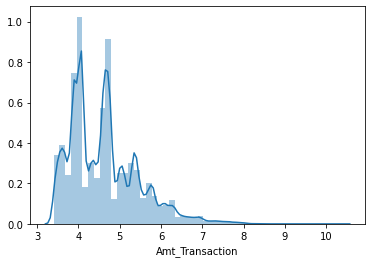

In [11]:
#Logarithmic Distribution of transaction amount for non-fradulant transactions
sns.distplot(np.log(train.Amt_Transaction[train['fraud_flag']==0]))

##### It seems that most of the non-fradulant transactions are spread across the low to mid range transactions having most the transactions in the lower side 

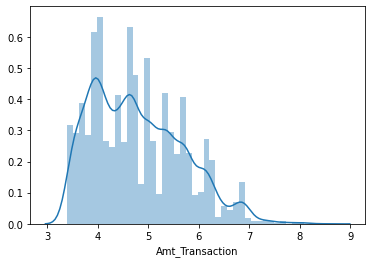

In [12]:
#Distribution of transaction amount for non-fradulant transactions
sns.distplot(np.log(train.Amt_Transaction[train['fraud_flag']==1]))

##### Fradulant transactions are spread across all ranges of transactions with most transactions between low to mid range

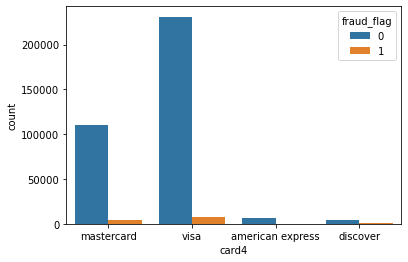

In [13]:
#Distribution of fraud and non-fraud based on different companies of card
sns.countplot(x='card4',data=train,hue='fraud_flag')

##### It seems that fradulant activity are done more using visa cards 

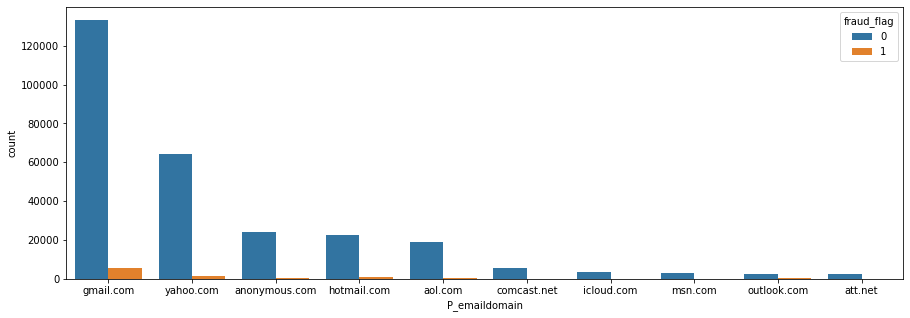

In [14]:
#Distribution of fraud and non-fraud based on type of card
plt.figure(figsize=(15,5))
sns.countplot(x='P_emaildomain',data=train,hue='fraud_flag',order=train.P_emaildomain.value_counts().iloc[:10].index)
plt.show()

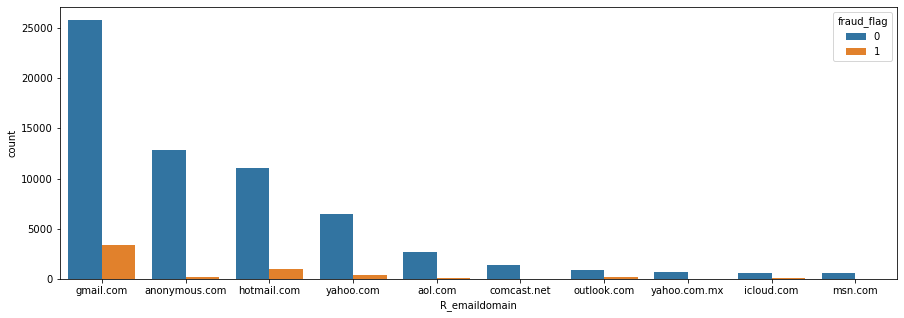

In [15]:
#Distribution of fraud and non-fraud based on type of card
plt.figure(figsize=(15,5))
sns.countplot(x='R_emaildomain',data=train,hue='fraud_flag',order=train.R_emaildomain.value_counts().iloc[:10].index)
plt.show()

##### Based on the above two countplot, gmail.com email ids are much involved in fradulant transactions

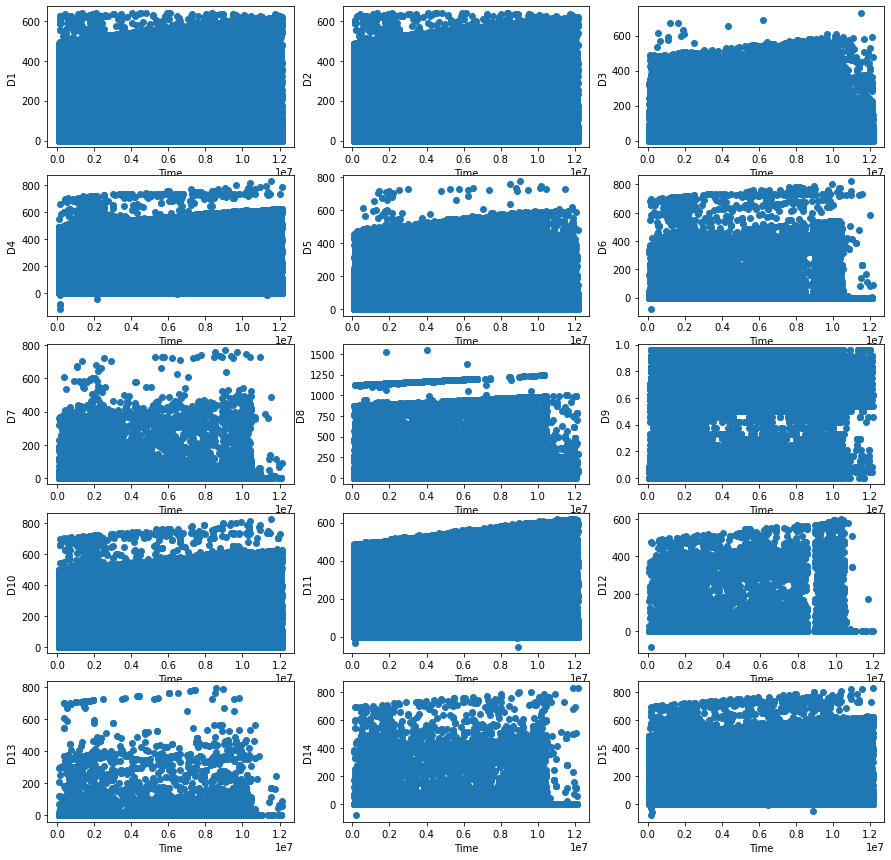

In [16]:
#Visualizing all 15 D columns
# plt.subplot(5,3)
plt.figure(figsize=(15,15))
for i in range(1,16):
    plt.subplot(5,3,i)
    plt.scatter(train.Transactiondatetime_insec,train['D'+str(i)])
    plt.xlabel('Time')
    plt.ylabel('D'+str(i))
plt.show()

##### It seems like except D1, D2, D3, D5 and D9, all other time deltas are increasing with time. Converting them in the values into the past by substracting Transactiondatetime_insec value from the respective D column value.

In [17]:
#Normalizing D columns except D1, D2, D3, D5 and D9, first converting Transactiondatetime_insec into 
#days as it is necessary that both columns should be in a common format. Doing this for both train 
#and test dataframe.

for i in range(1,16):
    if i in [1,2,3,5,9]:
        continue
    else:
        train['D'+str(i)] =  train['D'+str(i)] - train.Transactiondatetime_insec/np.float32(24*60*60)
        X_test['D'+str(i)] = X_test['D'+str(i)] - X_test.Transactiondatetime_insec/np.float32(24*60*60)

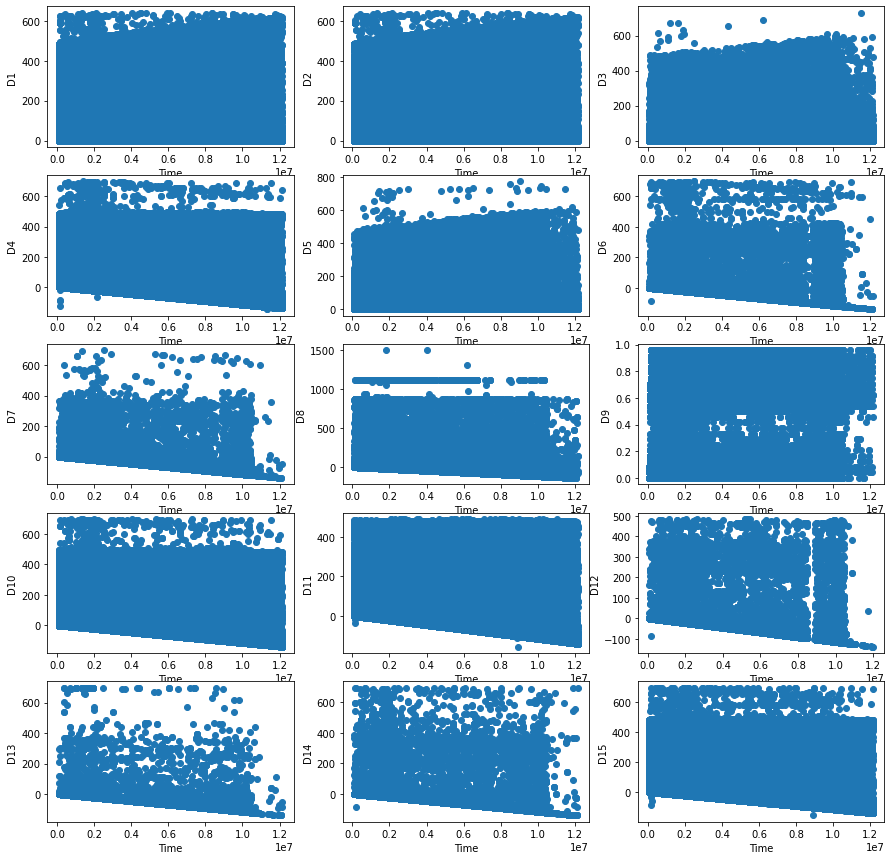

In [18]:
#Visualizing all 15 D columns after normalization
# plt.subplot(5,3)
plt.figure(figsize=(15,15))
for i in range(1,16):
    plt.subplot(5,3,i)
    plt.scatter(train.Transactiondatetime_insec,train['D'+str(i)])
    plt.xlabel('Time')
    plt.ylabel('D'+str(i))
plt.show()

### Feature Engineering

In [19]:
# Frequency Encoding to help algorithms in detecting whether value is commom or a rare one. 
def freqEncoding(train, X_test, cols):
    for col in cols:
        df = pd.concat([train[col],X_test[col]])
        temp = df.value_counts(dropna=True, normalize=True).to_dict()
        temp[-1] = -1
        nc = col+'_FE'
        train[nc] = train[col].map(temp)
        train[nc] = train[nc].astype('float32')
        X_test[nc] = X_test[col].map(temp)
        X_test[nc] = X_test[nc].astype('float32')
        print(nc ,end=', ')

In [20]:
#frequency encoding for addr1, card1, card2, card3 and P_emaildomain columns
freqEncoding(train,X_test,['addr1','card1','card2','card3','P_emaildomain'])

addr1_FE, card1_FE, card2_FE, card3_FE, P_emaildomain_FE, 

In [21]:
# label enconding for converting categorical values to numerical ones. Also, along with that,
# memory reductions and setting NaN value to -1.
def lblEncoding(col, df1, df2):
    df_comb = pd.concat([df1[col],df2[col]],axis=0)
    df_comb,_ = df_comb.factorize(sort=True)
    nm = col
    if df_comb.max()>32768: 
        df1[nm] = df_comb[:len(df1)].astype('int32')
        df2[nm] = df_comb[len(df1):].astype('int32')
    elif df_comb.max()>128:
        df1[nm] = df_comb[:len(df1)].astype('int16')
        df2[nm] = df_comb[len(df1):].astype('int16')
    else:
        df1[nm] = df_comb[:len(df1)].astype('int8')
        df2[nm] = df_comb[len(df1):].astype('int8')
    del df_comb
    x=gc.collect()
#     print(nm ,end=' ')


# Combining features to get a new feature, this is done because it may be the case that alone single
# feature may not correlate with the target variable but after combining they may start correlating with
# the target variable.
def combFeature(col1,col2,df1,df2):
    cb = col1+'_'+col2
    df1[cb] = df1[col1].astype(str)+'_'+df1[col2].astype(str)
    df2[cb] = df2[col1].astype(str)+'_'+df2[col2].astype(str) 
    lblEncoding(cb,df1,df2)
    print(cb ,end=', ')

In [22]:
#combining columns card1 and addr1
combFeature('card1','addr1',train,X_test)

#combining columns card1, addr1 and p_emaildomain
combFeature('card1_addr1','P_emaildomain',train,X_test)

#frequency encoding for card1_addr1 and card1_addr1_P_emaildomain columns
freqEncoding(train,X_test,['card1_addr1','card1_addr1_P_emaildomain'])

card1_addr1, card1_addr1_P_emaildomain, card1_addr1_FE, card1_addr1_P_emaildomain_FE, 

In [23]:
# group aggregation for checkng if a value is common or rare for a particular group
def grpAggregation(main_columns, uids, aggregations=['mean'], train_df=train, test_df=X_test, 
              fillna=True, usena=False):
    for main_column in main_columns:  
        for col in uids:
            for agg_type in aggregations:
                new_col_name = main_column+'_'+col+'_'+agg_type
                temp_df = pd.concat([train_df[[col, main_column]], test_df[[col,main_column]]])
                if usena: 
                    temp_df.loc[temp_df[main_column]==-1,main_column] = np.nan
                temp_df = temp_df.groupby([col])[main_column].agg([agg_type]).reset_index().rename(
                                                        columns={agg_type: new_col_name})

                temp_df.index = list(temp_df[col])
                temp_df = temp_df[new_col_name].to_dict()   

                train_df[new_col_name] = train_df[col].map(temp_df).astype('float32')
                test_df[new_col_name]  = test_df[col].map(temp_df).astype('float32')
                
                if fillna:
                    train_df[new_col_name].fillna(-1,inplace=True)
                    test_df[new_col_name].fillna(-1,inplace=True)
                
                print(new_col_name,end=', ')

In [24]:
# group aggreagtion
grpAggregation(['Amt_Transaction','D9','D11'],['card1','card1_addr1','card1_addr1_P_emaildomain'],['mean','std'],usena=True)

Amt_Transaction_card1_mean, Amt_Transaction_card1_std, Amt_Transaction_card1_addr1_mean, Amt_Transaction_card1_addr1_std, Amt_Transaction_card1_addr1_P_emaildomain_mean, Amt_Transaction_card1_addr1_P_emaildomain_std, D9_card1_mean, D9_card1_std, D9_card1_addr1_mean, D9_card1_addr1_std, D9_card1_addr1_P_emaildomain_mean, D9_card1_addr1_P_emaildomain_std, D11_card1_mean, D11_card1_std, D11_card1_addr1_mean, D11_card1_addr1_std, D11_card1_addr1_P_emaildomain_mean, D11_card1_addr1_P_emaildomain_std, 

In [25]:
#Now moving towards selecting V columns after checking correaltion between them based on the groups 
#that have same number of null values

In [26]:
for i in range(102,340):
    if 'V'+str(i) in train.columns:
        print('V'+str(i),' --> ',train['V'+str(i)].isnull().sum()*100/train.shape[0])

V102  -->  0.006035499711942059
V121  -->  0.006035499711942059
V124  -->  0.006035499711942059
V125  -->  0.006035499711942059
V126  -->  0.006035499711942059
V127  -->  0.006035499711942059
V128  -->  0.006035499711942059
V130  -->  0.006035499711942059
V131  -->  0.006035499711942059
V133  -->  0.006035499711942059
V136  -->  0.006035499711942059
V137  -->  0.006035499711942059
V140  -->  84.89671065265699
V142  -->  84.89671065265699
V144  -->  84.89671065265699
V146  -->  84.89671065265699
V149  -->  84.89671065265699
V151  -->  84.89671065265699
V152  -->  84.89671065265699
V153  -->  84.89671065265699
V154  -->  84.89671065265699
V161  -->  84.89671065265699
V162  -->  84.89671065265699
V163  -->  84.89671065265699
V169  -->  78.95393816356204
V170  -->  78.95393816356204
V171  -->  78.95393816356204
V172  -->  78.95613289073002
V173  -->  78.95613289073002
V174  -->  78.95393816356204
V175  -->  78.95393816356204
V176  -->  78.95613289073002
V177  -->  78.95613289073002
V178  -

In [27]:
#Based on the null values obtaned above, we will draw the correlation plot and will take the feature out 
#which is having more number of unique values

In [28]:
def draw_correlation(V_cols):
    cols = ['Transactiondatetime_insec'] + V_cols
    plt.figure(figsize=(20,20))
    sns.heatmap(train[cols].corr(), annot=True, cmap='RdBu_r')
    plt.title(V_cols[0]+' - '+V_cols[-1],fontsize=14)
    plt.show()

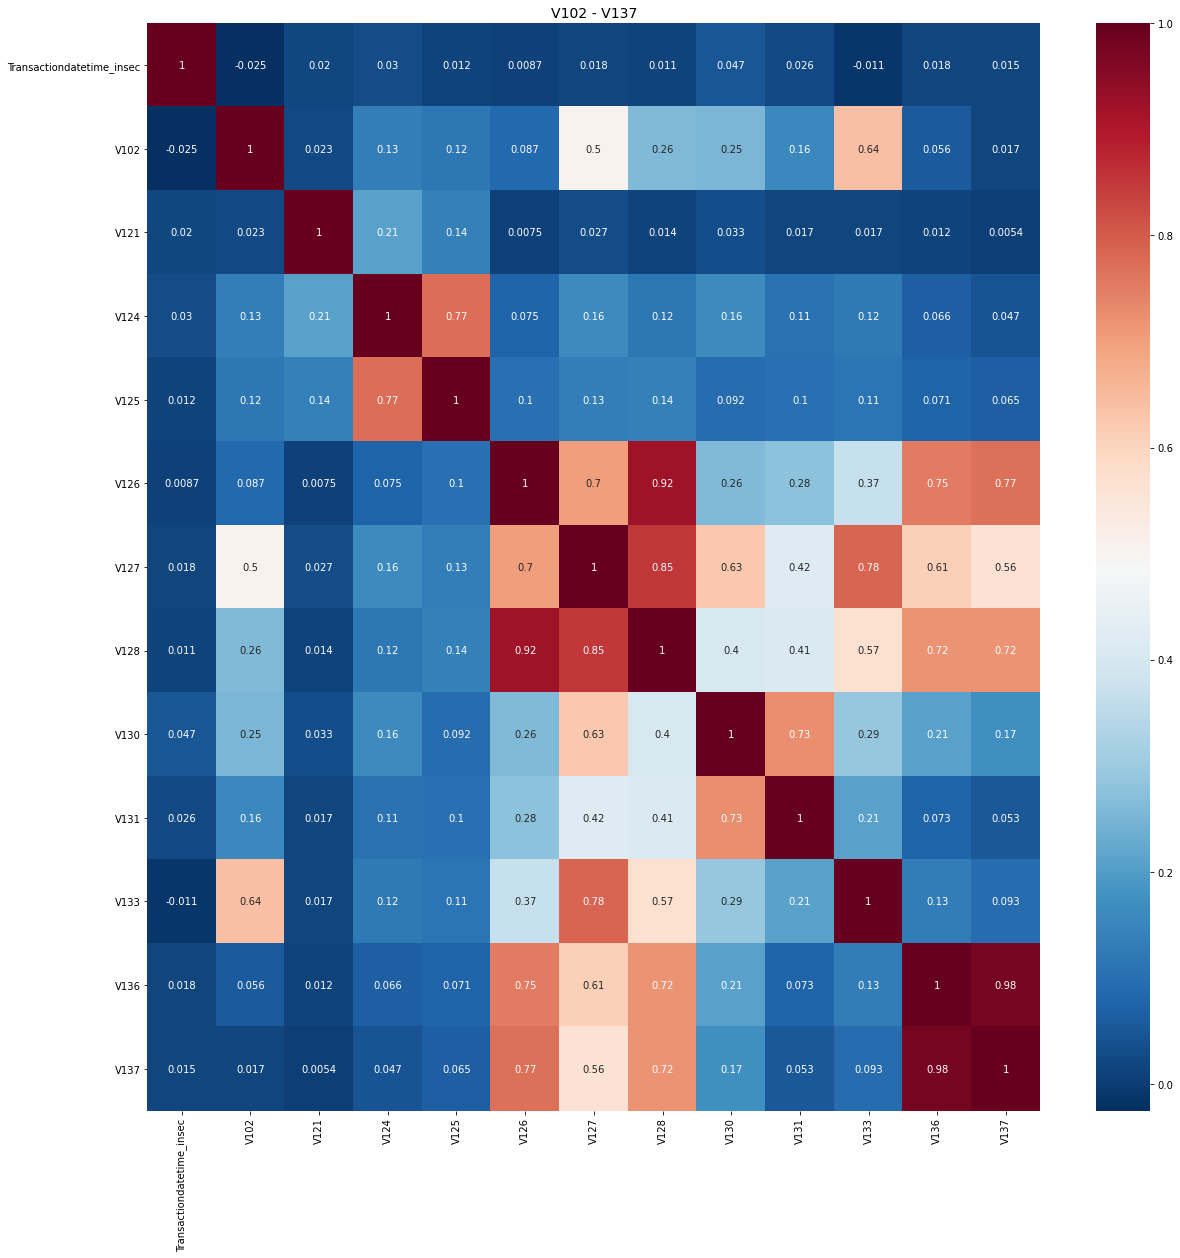

In [29]:
ll = ['V102', 'V121', 'V124', 'V125', 'V126', 'V127', 'V128', 'V130', 'V131', 'V133', 'V136', 'V137']
draw_correlation(ll)

In [30]:
def reduce_vcols(grps,col='V'):
    use = []
    for g in grps:
        mx = 0; vx = g[0]
        for gg in g:
            n = train[col+str(gg)].nunique()
            if n>mx:
                mx = n
                vx = gg
        use.append(vx)
    print('Use these',use)

In [31]:
grps = [[102],[121],[124,125],[126,127,128,133],[130,131],[136,137]]
reduce_vcols(grps)

Use these [102, 121, 124, 127, 130, 136]


In [32]:
v= [102, 121, 124, 127, 130, 136]

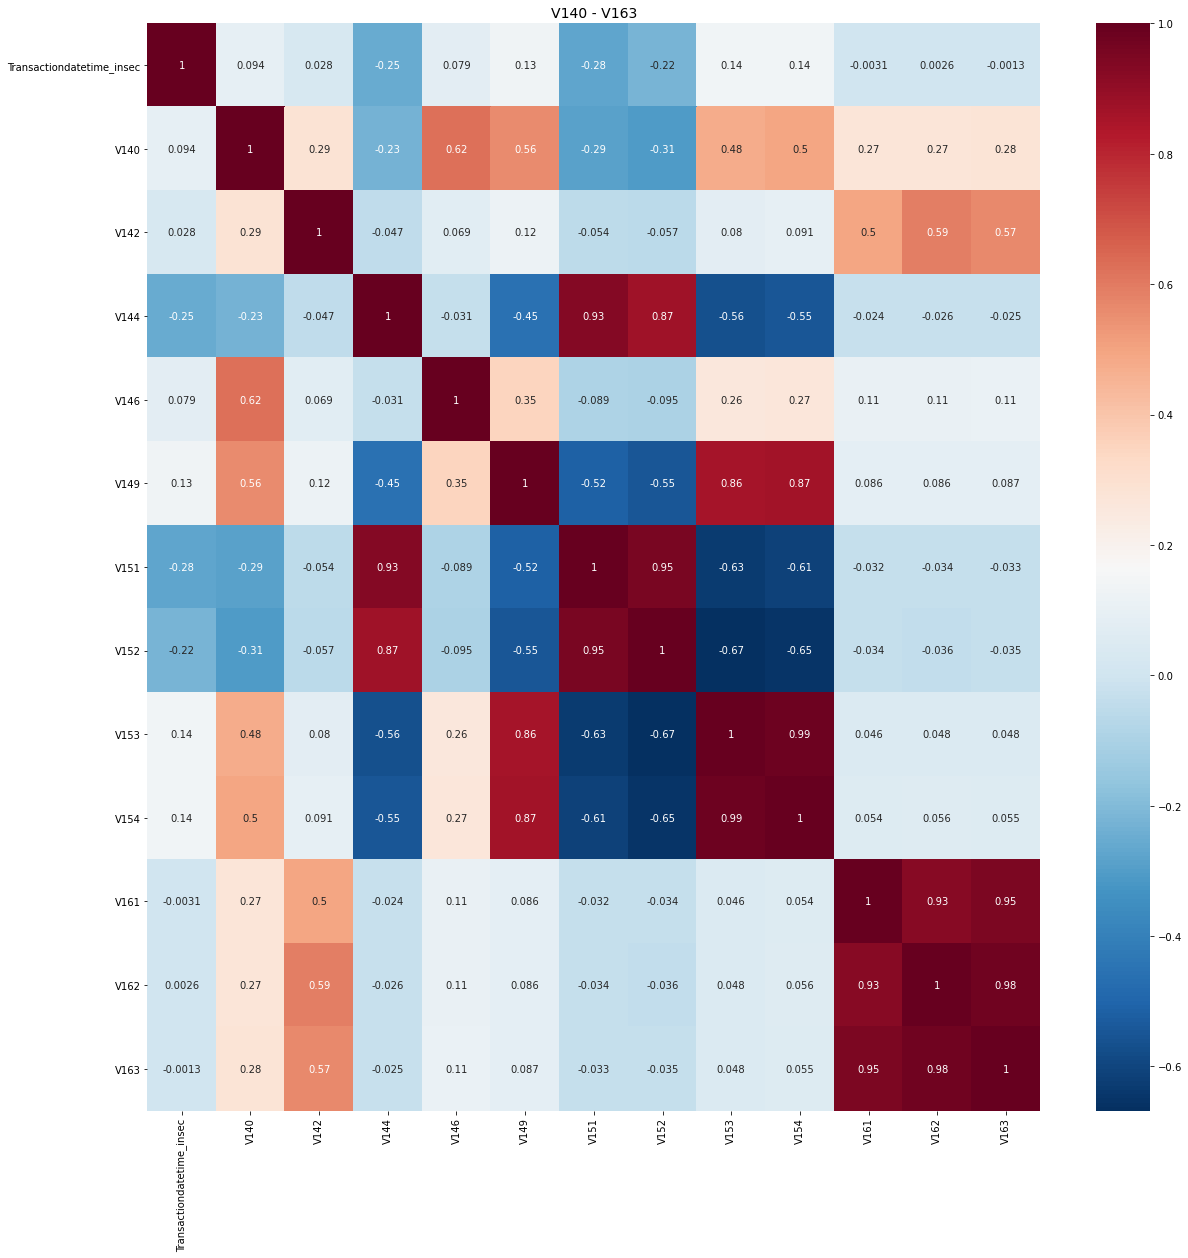

In [33]:
ll = ['V140','V142','V144','V146','V149','V151','V152','V153','V154','V161','V162','V163']
draw_correlation(ll)

In [34]:
grps = [[142],[140,146],[144,149,151,152,153,154],[161,162,163]]
reduce_vcols(grps)

Use these [142, 140, 144, 162]


In [35]:
v += [142, 140, 144, 162]

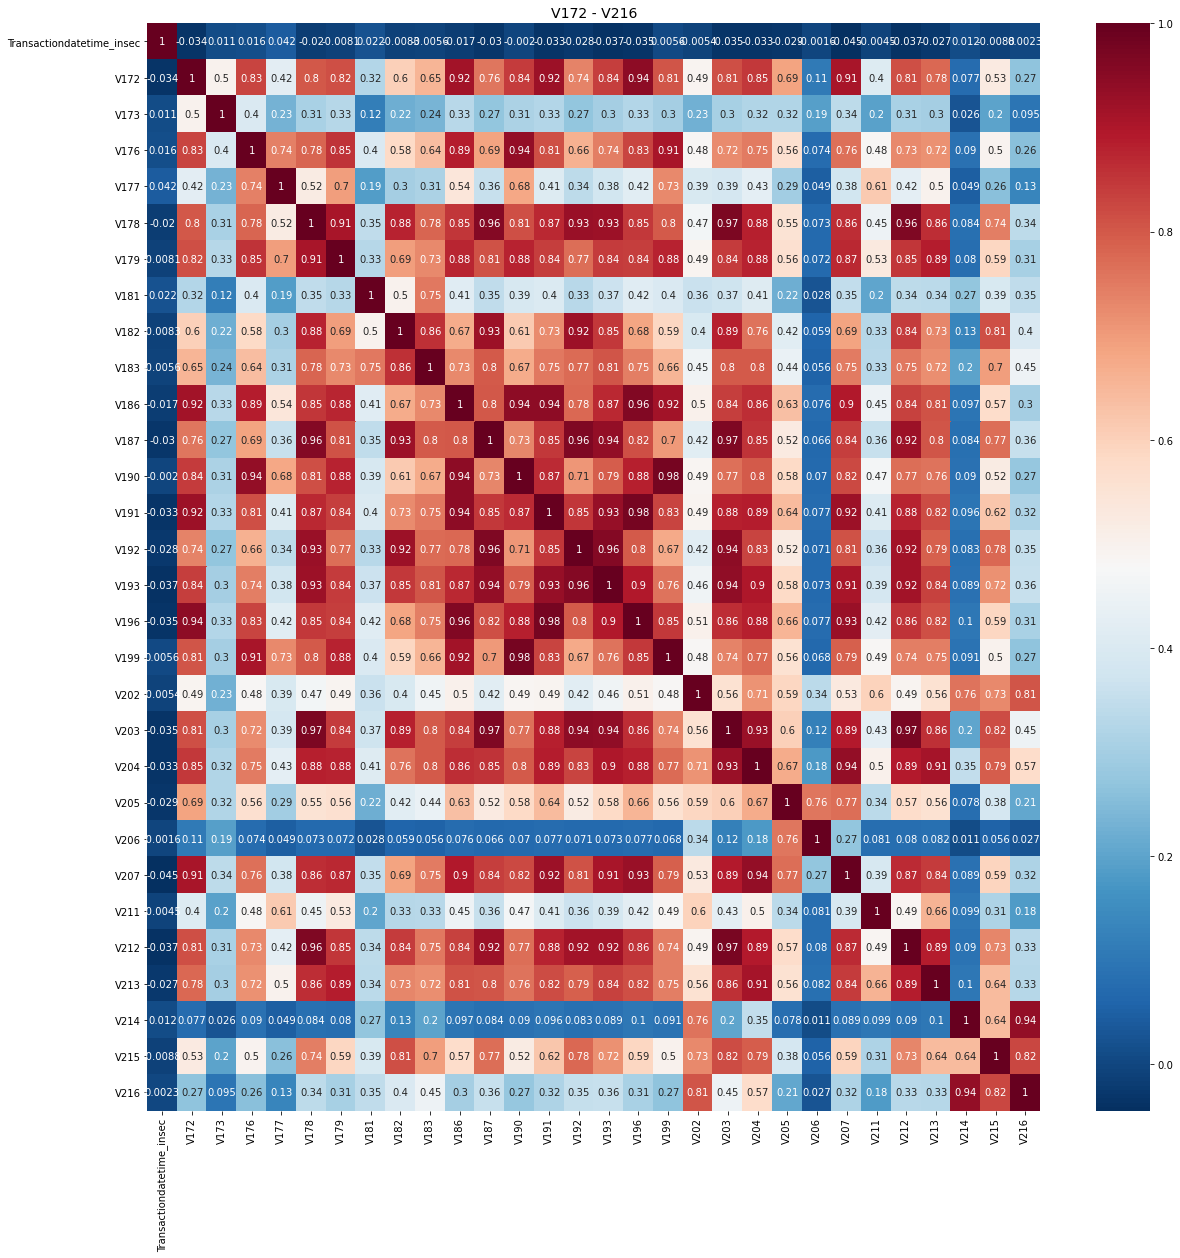

In [36]:
ll =['V172','V173','V176','V177','V178','V179','V181','V182','V183','V186','V187','V190','V191','V192','V193','V196','V199','V202','V203','V204','V205','V206','V207','V211','V212','V213','V214','V215','V216']
draw_correlation(ll)

In [37]:
grps = [[172,176,178,186,190,191,196,199],[173],[177],[178,179,187,192,193,203,212],[181,182,183],[202],[204,207,213],[205],[206],[211],[214,215,216]]
reduce_vcols(grps)

Use these [178, 173, 177, 203, 182, 202, 204, 205, 206, 211, 215]


In [38]:
v += [178, 173, 177, 203, 182, 202, 204, 205, 206, 211, 215]

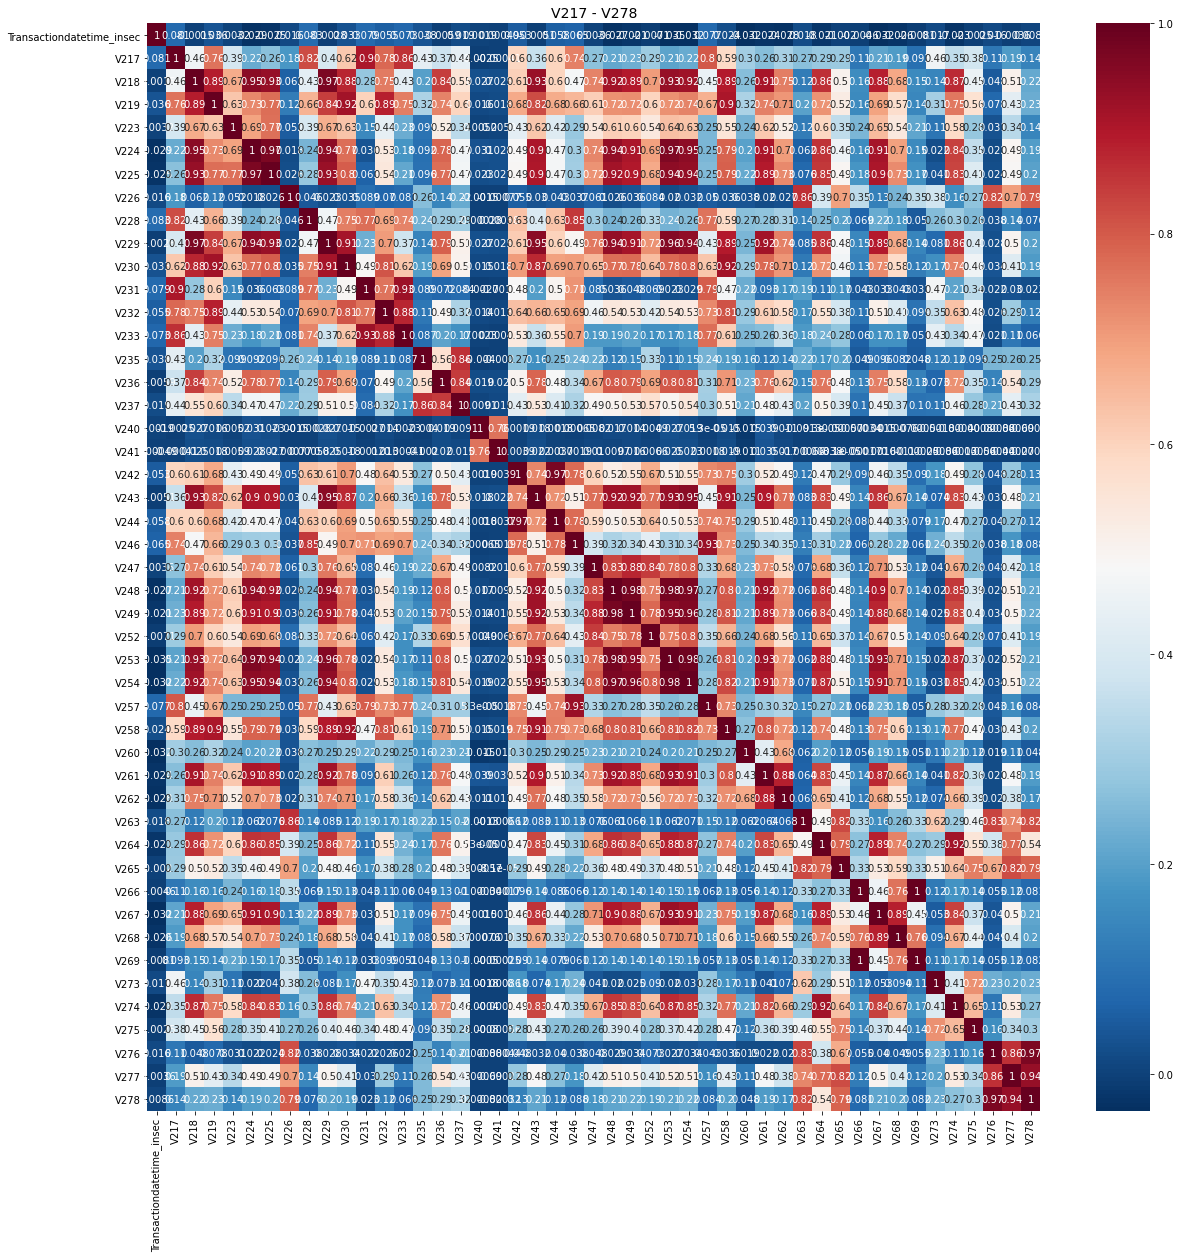

In [39]:
ll = ['V217','V218','V219','V223','V224','V225','V226','V228','V229','V230','V231','V232','V233','V235','V236','V237','V240','V241','V242','V243','V244','V246','V247','V248','V249','V252','V253','V254','V257','V258','V260','V261','V262','V263','V264','V265','V266','V267','V268','V269','V273','V274','V275','V276','V277','V278']
draw_correlation(ll)

In [40]:
grps = [[217,231,232,233],[223],[218,219,224,225,230,258],[226],[235,236,237],[240,241],[242,244],[229,243,247,248,249,253,254,267,268],[228,246,257],[252],[260],[261,262],[263],[265],[266,269],[273],[264,274],[275],[276,277,278]]
reduce_vcols(grps)

Use these [217, 223, 218, 226, 236, 240, 244, 267, 228, 252, 260, 261, 263, 265, 266, 273, 264, 275, 277]


In [41]:
v += [217, 223, 218, 226, 236, 240, 244, 267, 228, 252, 260, 261, 263, 265, 266, 273, 264, 275, 277]

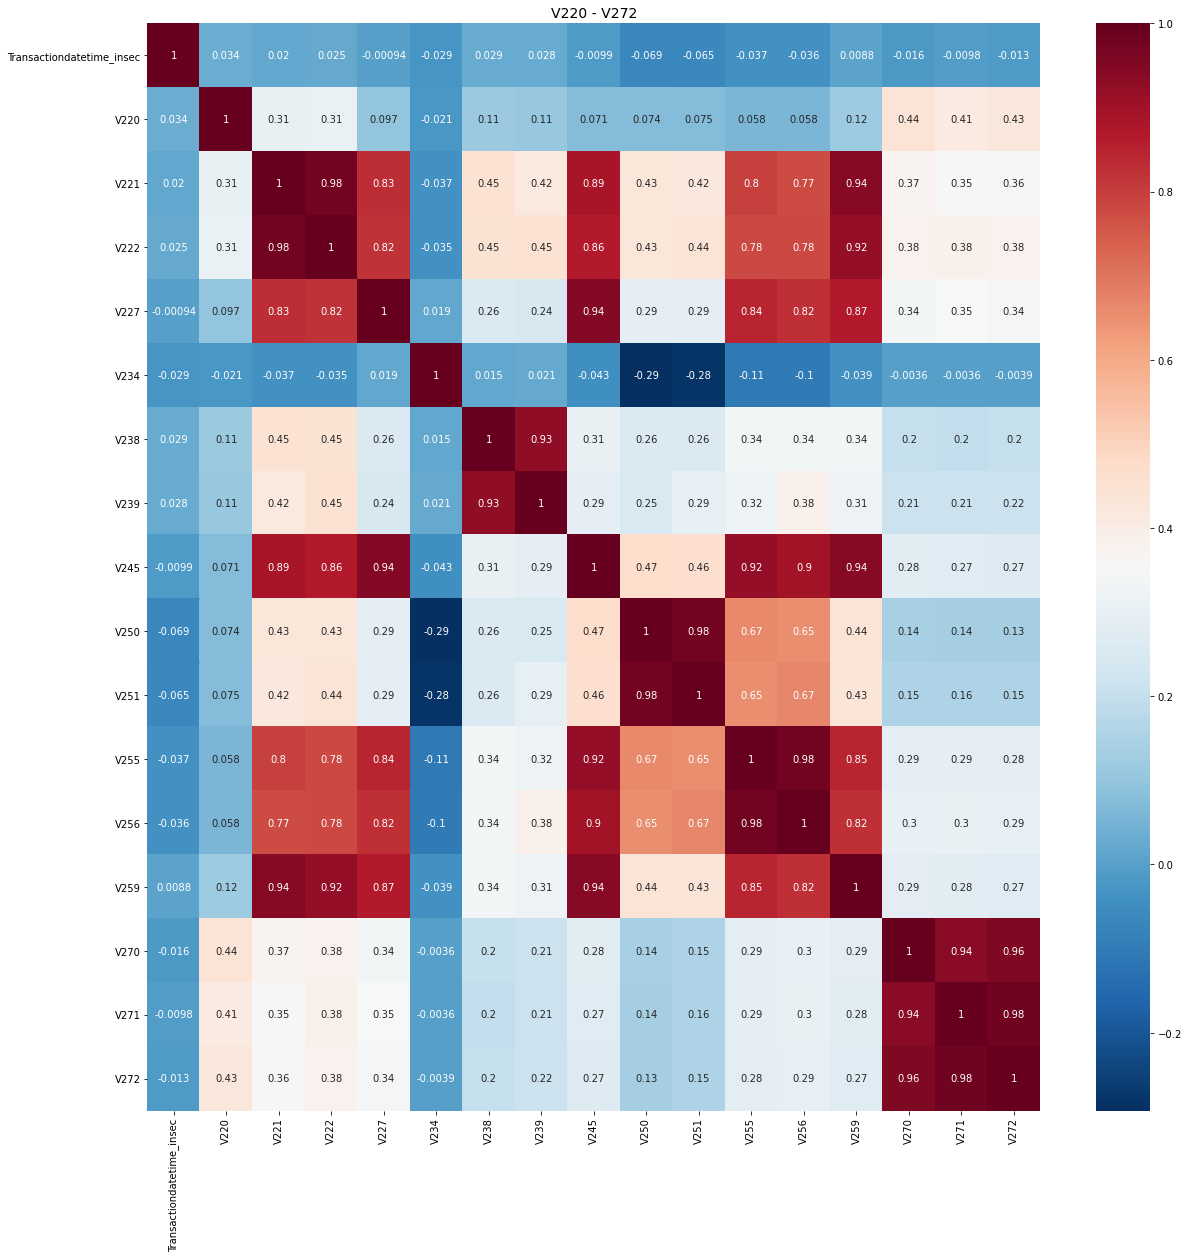

In [42]:
ll = ['V220','V221','V222','V227','V234','V238','V239','V245','V250','V251','V255','V256','V259','V270','V271','V272']
draw_correlation(ll)

In [43]:
grps = [[220],[221,222,259,227,245,255,256,259],[234],[238,239],[250,251],[270,271,272]]
reduce_vcols(grps)

Use these [220, 221, 234, 238, 250, 271]


In [44]:
v += [220, 221, 234, 238, 250, 271]

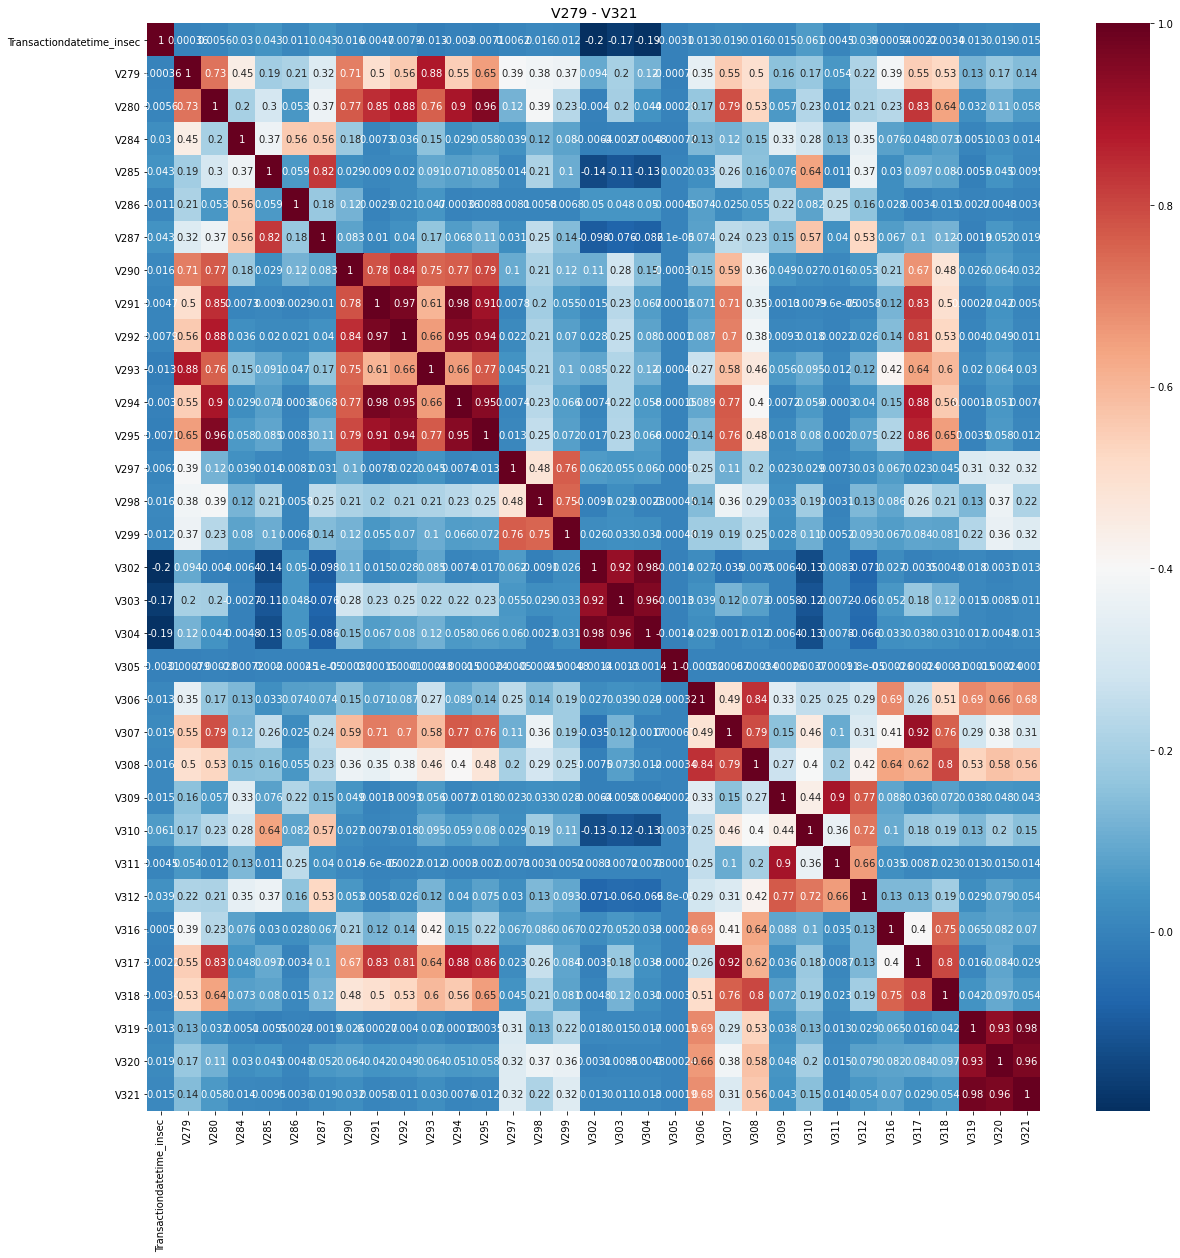

In [45]:
ll = ['V279','V280','V284','V285','V286','V287','V290','V291','V292','V293','V294','V295','V297','V298','V299','V302','V303','V304','V305','V306','V307','V308','V309','V310','V311','V312','V316','V317','V318','V319','V320','V321']
draw_correlation(ll)

In [46]:
grps = [[279,293],[280,294,295],[293],[284],[285,287],[286],[290,291,292],[297],[298],[299],[302,303,304],[305],[307,317],[306,308],[309,311],[310],[312],[316],[318],[319,320,321]]
reduce_vcols(grps)

Use these [279, 294, 293, 284, 285, 286, 291, 297, 298, 299, 303, 305, 307, 308, 309, 310, 312, 316, 318, 320]


In [47]:
v += [279, 294, 293, 284, 285, 286, 291, 297, 298, 299, 303, 305, 307, 308, 309, 310, 312, 316, 318, 320]

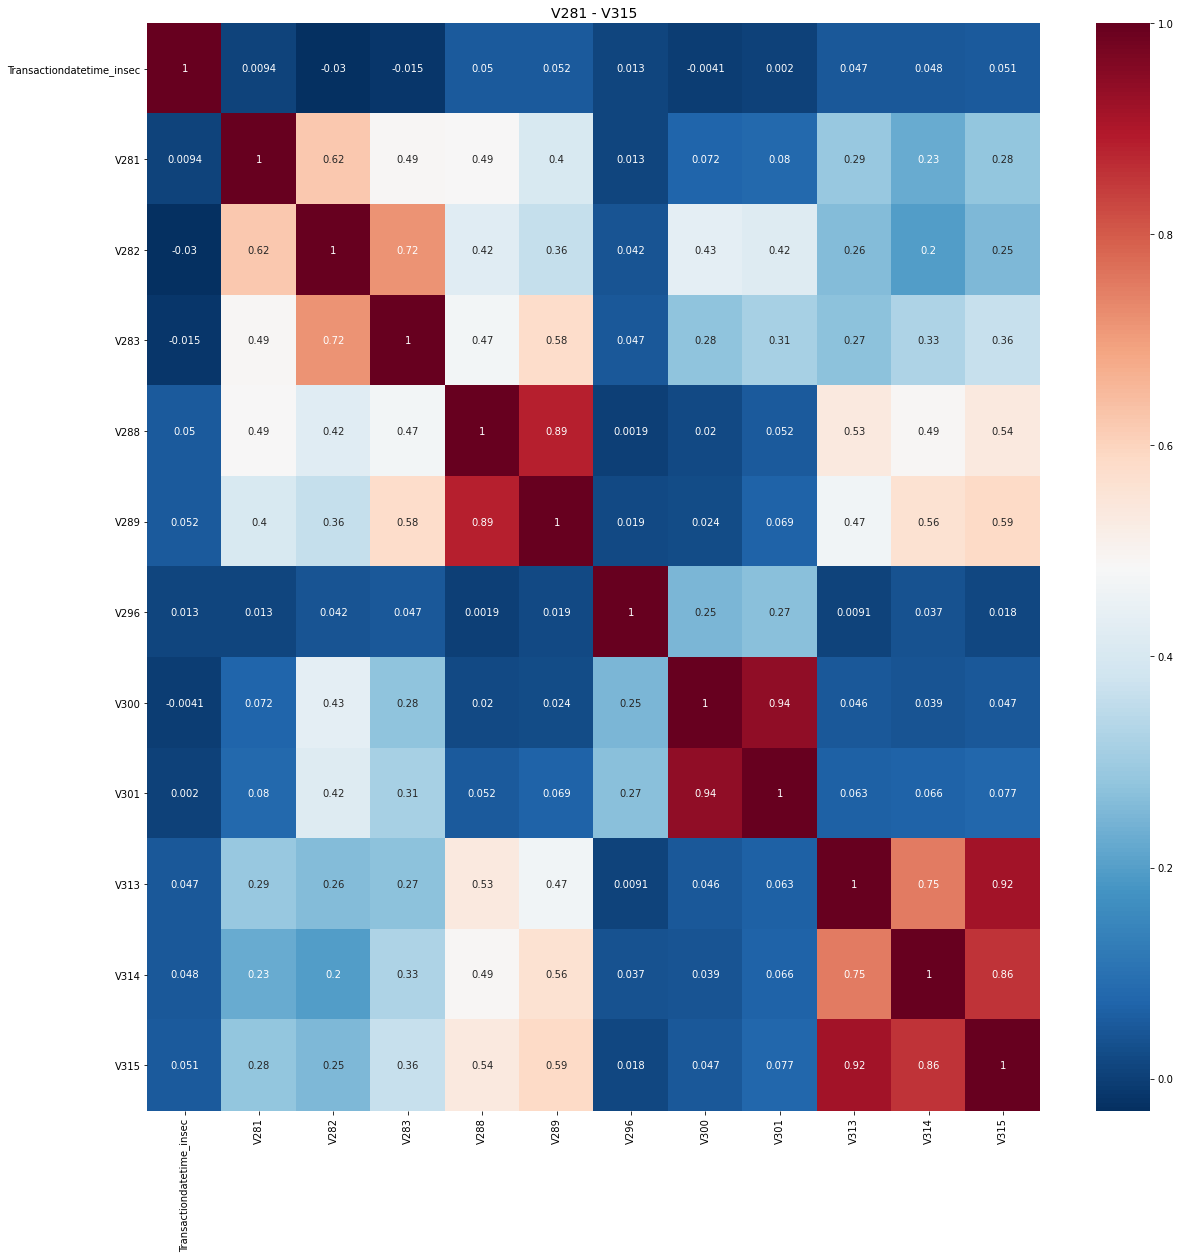

In [48]:
ll = ['V281','V282','V283','V288','V289','V296','V300','V301','V313','V314','V315']
draw_correlation(ll)

In [49]:
grps = [[281],[282],[283],[288,289],[296],[300,301],[313,314,315]]
reduce_vcols(grps)

Use these [281, 282, 283, 289, 296, 300, 314]


In [50]:
v += [281, 282, 283, 289, 296, 300, 314]

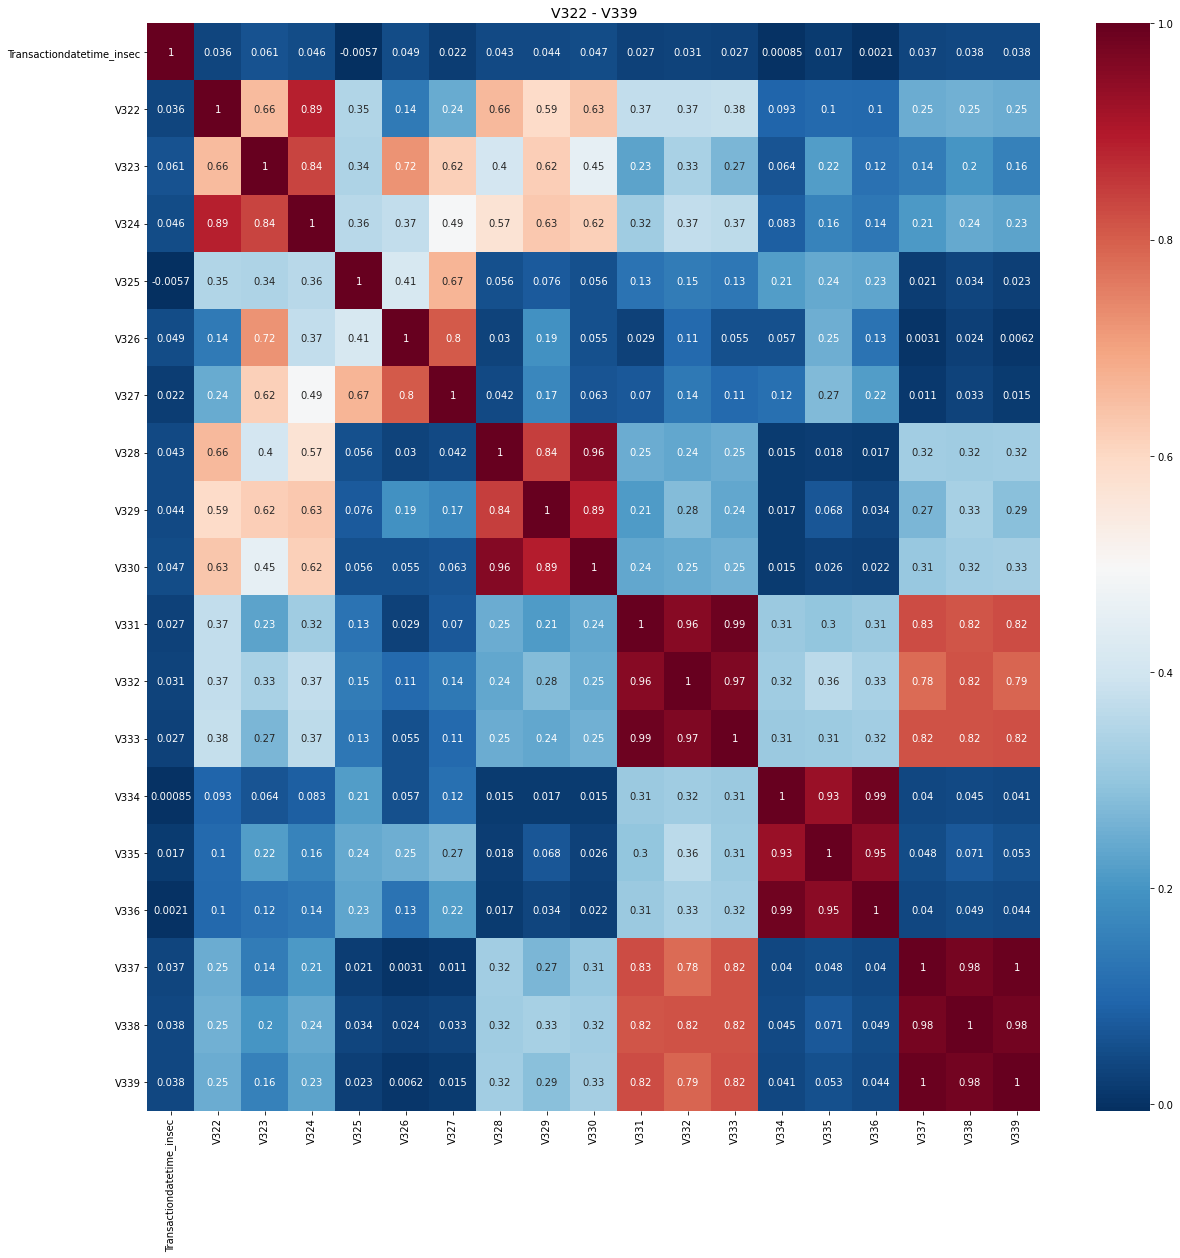

In [51]:
ll = ['V322','V323','V324','V325','V326','V327','V328','V329','V330','V331','V332','V333','V334','V335','V336','V337','V338','V339']
draw_correlation(ll)

In [52]:
grps = [[322,323,324],[326,327],[328,329,330],[331,332,333],[325],[334,335,336],[337,338,339]]
reduce_vcols(grps)

Use these [323, 326, 329, 332, 325, 335, 338]


In [53]:
v += [323, 326, 329, 332, 325, 335, 338]

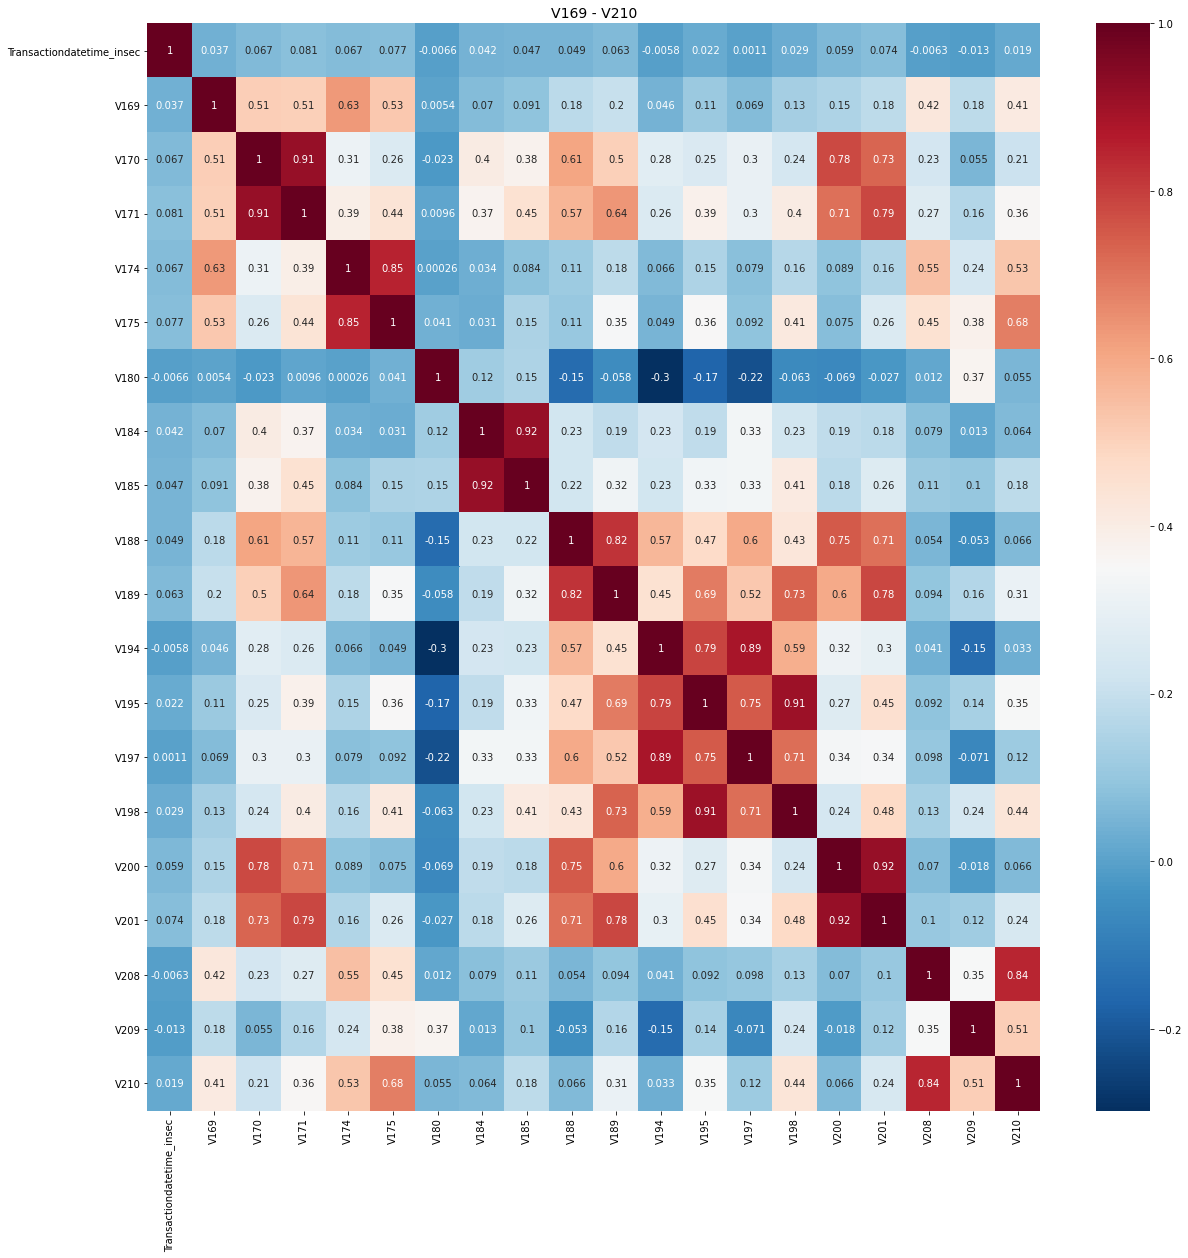

In [54]:
ll = ['V169','V170','V171','V174','V175','V180','V184','V185','V188','V189','V194','V195','V197','V198','V200','V201','V208','V209','V210']
draw_correlation(ll)

In [55]:
grps = [[169],[170,171],[174,175],[180],[184,188],[188,189],[194,197],[195,198],[200,201],[208,210],[209]]
reduce_vcols(grps)

Use these [169, 170, 175, 180, 188, 188, 197, 198, 200, 210, 209]


In [56]:
v += [169, 170, 175, 180, 188, 188, 197, 198, 200, 210, 209]

In [57]:
string = 'V'
cols = [string+str(x) for x in v]

In [58]:
M_col = ['M'+str(x) for x in range(1,10)]
mp_txt = {'F':0,'T':1,'M0':0,'M1':1,'M2':2}

for k in M_col: 
    train[k] = train[k].map(mp_txt)

In [59]:
for k in M_col:
    X_test[k] = X_test[k].map(mp_txt)

In [60]:
id_col=[]
for i in range(12,39):
    if 'id_'+str(i) in train.columns:
        id_col.append('id_'+str(i))

In [61]:
train[id_col]

,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
transactionid,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NotFound,49.0,NaN,Unknown,NaN,166.0,13.0,223.0,222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,mobile safari 11.0,NaN,NaN,NaN,F,F,F,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364507,NotFound,33.0,-360.0,Found,Found,166.0,NaN,542.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_13_3,chrome 63.0,24.0,4096x2304,match_status:2,T,F,T,F


In [62]:
id_col_to_change = ['id_12','id_15','id_16','id_27','id_28','id_29','id_35','id_36','id_37','id_38']
mp_txt = {'Unknown':0,'NotFound':1,'Found':2,'New':3,'F':0,'T':1}

for k in id_col_to_change: 
    train[k] = train[k].map(mp_txt)

In [63]:
for k in id_col_to_change: 
    X_test[k] = X_test[k].map(mp_txt)

In [64]:
#Deriving more columns on existing columns
train['day_count'] = train.Transactiondatetime_insec / (24*60*60)
train['ncol'] = train.card1_addr1.astype(str)+'_'+np.floor(train.day_count-train.D1).astype(str)

X_test['day_count'] = X_test.Transactiondatetime_insec / (24*60*60)
X_test['ncol'] = X_test.card1_addr1.astype(str)+'_'+np.floor(X_test.day_count-X_test.D1).astype(str)

In [65]:
#Segregating cents value from Amt_Transaction to find a new feature
train['cents'] = (train['Amt_Transaction'] - np.floor(train['Amt_Transaction'])).astype('float32')
X_test['cents'] = (X_test['Amt_Transaction'] - np.floor(X_test['Amt_Transaction'])).astype('float32')

In [66]:
# GROUP AGGREGATION NUNIQUE
def nuniqueGroup(main_cols, ncols, train_df=train, test_df=X_test):
    for main_col in main_cols:  
        for ncol in ncols:
            conct = pd.concat([train_df[[ncol]+[main_col]],test_df[[ncol]+[main_col]]],axis=0)
            mpng = conct.groupby(ncol)[main_col].agg(['nunique'])['nunique'].to_dict()
            train_df[ncol+'_'+main_col+'_ct'] = train_df[ncol].map(mpng).astype('float32')
            test_df[ncol+'_'+main_col+'_ct'] = test_df[ncol].map(mpng).astype('float32')
            print(ncol+'_'+main_col+'_ct',end=', ')

In [67]:
#frequency encoding
freqEncoding(train,X_test,['ncol'])

#group aggregation
grpAggregation(['Amt_Transaction','D4','D9','D10','D15'],['ncol'],['mean','std'],fillna=True,usena=True)
grpAggregation(['C'+str(x) for x in range(1,15) if x!=3],['ncol'],['mean'],train,X_test,fillna=True,usena=True)
grpAggregation(['M'+str(x) for x in range(1,10)],['ncol'],['mean'],fillna=True,usena=True)

#nunique group aggregation
nuniqueGroup(['P_emaildomain','dist1','id_02','cents'], ['ncol'], train_df=train, test_df=X_test)

ncol_FE, Amt_Transaction_ncol_mean, Amt_Transaction_ncol_std, D4_ncol_mean, D4_ncol_std, D9_ncol_mean, D9_ncol_std, D10_ncol_mean, D10_ncol_std, D15_ncol_mean, D15_ncol_std, C1_ncol_mean, C2_ncol_mean, C4_ncol_mean, C5_ncol_mean, C6_ncol_mean, C7_ncol_mean, C8_ncol_mean, C9_ncol_mean, C10_ncol_mean, C11_ncol_mean, C12_ncol_mean, C13_ncol_mean, C14_ncol_mean, M1_ncol_mean, M2_ncol_mean, M3_ncol_mean, M4_ncol_mean, M5_ncol_mean, M6_ncol_mean, M7_ncol_mean, M8_ncol_mean, M9_ncol_mean, ncol_P_emaildomain_ct, ncol_dist1_ct, ncol_id_02_ct, ncol_cents_ct, 

In [68]:
#group aggregation
grpAggregation(['C14'],['ncol'],['std'],train,X_test,fillna=True,usena=True)

#nunique group aggregation
nuniqueGroup(['C13','V314'], ['ncol'], train_df=train, test_df=X_test) 
nuniqueGroup(['V127','V136','V309','V307','V320'], ['ncol'], train_df=train, test_df=X_test)

C14_ncol_std, ncol_C13_ct, ncol_V314_ct, ncol_V127_ct, ncol_V136_ct, ncol_V309_ct, ncol_V307_ct, ncol_V320_ct, 

In [69]:
# deducing max_diff feature
train['max_diff'] = (np.abs(train.D1-train.D15)>3).astype('int8')
X_test['max_diff'] = (np.abs(X_test.D1-X_test.D15)>3).astype('int8')

In [70]:
train.shape

(364510, 459)

In [71]:
X_test.shape

(141828, 458)

In [72]:
#Dummy variables implementation for selected categorical variables.
def dum_implmt(column,df):
    df_temp = pd.get_dummies(df[column], prefix=column, drop_first = True)
    df = pd.concat([df, df_temp], axis = 1)
    df.drop([column], axis = 1, inplace = True)
    return df

In [73]:
#Dummy variables implementation for selected categorical variables.
def dum_implmt_rm(column,df):
    df_temp = pd.get_dummies(df[column], prefix=column)
    df_temp.drop([column+'_remove'], axis=1, inplace= True)
    df = pd.concat([df, df_temp], axis = 1)
    df.drop([column], axis = 1, inplace = True)
    return df

In [74]:
train = dum_implmt('ProductCD',train)
X_test = dum_implmt('ProductCD',X_test)

In [75]:
train = dum_implmt('card6',train)

df_temp = pd.get_dummies(X_test['card6'], prefix='card6')
X_test = pd.concat([X_test, df_temp], axis = 1)
X_test.drop(['card6'], axis = 1, inplace = True)

In [76]:
train['P_emaildomain'].fillna('remove',inplace=True)
train['R_emaildomain'].fillna('remove',inplace=True)

X_test['P_emaildomain'].fillna('remove',inplace=True)
X_test['R_emaildomain'].fillna('remove',inplace=True)

In [77]:
train['P_emaildomain'] = train['P_emaildomain'].str.split('.').str[0]
train = dum_implmt_rm('P_emaildomain',train)

In [78]:
train['R_emaildomain'] = train['R_emaildomain'].str.split('.').str[0]
train = dum_implmt_rm('R_emaildomain',train)

In [79]:
X_test['P_emaildomain'] = X_test['P_emaildomain'].str.split('.').str[0]
X_test = dum_implmt_rm('P_emaildomain',X_test)

In [80]:
X_test['R_emaildomain'] = X_test['R_emaildomain'].str.split('.').str[0]
X_test = dum_implmt_rm('R_emaildomain',X_test)

In [81]:
train['id_31']=train['id_31'].str.split(' ').str[0]
train['id_31']=train['id_31'].str.lower().str.split('/').str[0]
train['id_31'] = train['id_31'].str.replace('mozilla','firefox')
train = dum_implmt('id_31',train)

In [82]:
X_test['id_31']=X_test['id_31'].str.split(' ').str[0]
X_test['id_31']=X_test['id_31'].str.lower().str.split('/').str[0]
X_test['id_31'] = X_test['id_31'].str.replace('mozilla','firefox')
X_test = dum_implmt('id_31',X_test)

In [83]:
train['DeviceType'].fillna('remove',inplace=True)
X_test['DeviceType'].fillna('remove',inplace=True)

In [84]:
train = dum_implmt_rm('DeviceType',train)
X_test = dum_implmt_rm('DeviceType',X_test)

In [85]:
train['DeviceInfo'].fillna('remove',inplace=True)
X_test['DeviceInfo'].fillna('remove',inplace=True)

In [86]:
temp = list(set(X_test['DeviceInfo']).difference(set(train['DeviceInfo'])))
X_test['DeviceInfo'] = X_test['DeviceInfo'].replace(temp,'remove')
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['DeviceInfo'] = le.fit_transform(train['DeviceInfo'])
X_test['DeviceInfo'] = le.transform(X_test['DeviceInfo'])

In [ ]:
#Filtering common columns in train and test dataset in the below 5 cells 

In [87]:
l = list(train.columns)
ll= list(X_test.columns)
k = [item for item in ll if item not in l]

In [88]:
X_test.drop(k, axis=1, inplace=True)

In [89]:
l = list(train.columns)
ll= list(X_test.columns)
kk = [item for item in l if item not in ll]

In [90]:
kk.remove('fraud_flag')

In [91]:
train.drop(kk,axis=1, inplace=True)

In [92]:
#Removing one outlier present in Amt_Transaction column
train.drop(train[train['Amt_Transaction']>25000].index, inplace = True)

In [93]:
#Dropping unnecessary columns
col = list( train.columns )
for i in range(102,340):
    if 'V'+str(i) in col:
        if 'V'+str(i) not in cols:
            col.remove('V'+str(i))
            
col.remove('Transactiondatetime_insec')

for k in ['D6','D7','D8','D9','D12','D13','D14']:
    col.remove(k)
    
for k in ['C3','M5','id_08','id_33']:
    col.remove(k)
    
for k in ['card4','id_07','id_14','id_21','id_30','id_32','id_34']:
    col.remove(k)
    
for k in ['id_'+str(x) for x in range(22,28)]:
    col.remove(k)
    
col.remove('fraud_flag')
col.remove('day_count')
col.remove('cents')
col.remove('ncol')

In [114]:
train.reset_index(inplace=True)

In [115]:
#Dividing target column and dependent column seperately into y and X repectively
X_train = train.drop(['fraud_flag'], axis=1)
y_train = train['fraud_flag']

In [116]:
#Splitting index based on train and validation dataset
val = X_train.index[:1*len(X_train)//9]
trn = X_train.index[1*len(X_train)//9:]

In [118]:
#Parameters found after doing RadomSearchCV on train dataset with cv=3
from xgboost import XGBClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.model_selection import StratifiedKFold
import catboost as cb

clf = XGBClassifier(booster='gbtree',
            n_estimators=5000,
            max_depth=12,
            learning_rate=0.02,
            subsample=0.8,
            colsample_bytree=0.4,
            missing=-1,
            eval_metric='auc',
            tree_method='gpu_hist' 
)

lr = cb.CatBoostClassifier(task_type= 'GPU',eval_metric="CrossEntropy",depth=14,iterations=500,learning_rate=0.01,random_state = 42)

sclf = StackingCVClassifier(classifiers=[clf],
                            use_probas=True,
                            meta_classifier=lr, cv=StratifiedKFold(n_splits=3), shuffle=True, stratify=True,
                            random_state=42)

In [119]:
sclf.fit(X_train[col].iloc[trn], y_train.iloc[trn])

0:	learn: 0.6648842	total: 237ms	remaining: 1m 58s
1:	learn: 0.6380928	total: 463ms	remaining: 1m 55s
2:	learn: 0.6120877	total: 688ms	remaining: 1m 53s
3:	learn: 0.5870733	total: 913ms	remaining: 1m 53s
4:	learn: 0.5631156	total: 1.14s	remaining: 1m 52s
5:	learn: 0.5401953	total: 1.45s	remaining: 1m 59s
6:	learn: 0.5182870	total: 1.71s	remaining: 2m
7:	learn: 0.4972729	total: 1.97s	remaining: 2m
8:	learn: 0.4771909	total: 2.19s	remaining: 1m 59s
9:	learn: 0.4580567	total: 2.43s	remaining: 1m 59s
10:	learn: 0.4396903	total: 2.66s	remaining: 1m 58s
11:	learn: 0.4221570	total: 2.88s	remaining: 1m 57s
12:	learn: 0.4054201	total: 3.11s	remaining: 1m 56s
13:	learn: 0.3894246	total: 3.34s	remaining: 1m 55s
14:	learn: 0.3741791	total: 3.56s	remaining: 1m 55s
15:	learn: 0.3596176	total: 3.79s	remaining: 1m 54s
16:	learn: 0.3457224	total: 4.01s	remaining: 1m 54s
17:	learn: 0.3324657	total: 4.26s	remaining: 1m 53s
18:	learn: 0.3198177	total: 4.49s	remaining: 1m 53s
19:	learn: 0.3077542	total: 4.

158:	learn: 0.0406095	total: 37s	remaining: 1m 19s
159:	learn: 0.0405285	total: 37.2s	remaining: 1m 19s
160:	learn: 0.0404487	total: 37.4s	remaining: 1m 18s
161:	learn: 0.0403728	total: 37.7s	remaining: 1m 18s
162:	learn: 0.0402981	total: 37.9s	remaining: 1m 18s
163:	learn: 0.0402251	total: 38.1s	remaining: 1m 18s
164:	learn: 0.0401537	total: 38.3s	remaining: 1m 17s
165:	learn: 0.0400845	total: 38.6s	remaining: 1m 17s
166:	learn: 0.0400169	total: 38.8s	remaining: 1m 17s
167:	learn: 0.0399518	total: 39s	remaining: 1m 17s
168:	learn: 0.0398873	total: 39.2s	remaining: 1m 16s
169:	learn: 0.0398251	total: 39.5s	remaining: 1m 16s
170:	learn: 0.0397631	total: 39.8s	remaining: 1m 16s
171:	learn: 0.0397036	total: 40s	remaining: 1m 16s
172:	learn: 0.0396459	total: 40.3s	remaining: 1m 16s
173:	learn: 0.0395894	total: 40.5s	remaining: 1m 15s
174:	learn: 0.0395344	total: 40.7s	remaining: 1m 15s
175:	learn: 0.0394801	total: 40.9s	remaining: 1m 15s
176:	learn: 0.0394276	total: 41.2s	remaining: 1m 15s

316:	learn: 0.0372973	total: 1m 13s	remaining: 42.7s
317:	learn: 0.0372950	total: 1m 14s	remaining: 42.4s
318:	learn: 0.0372926	total: 1m 14s	remaining: 42.2s
319:	learn: 0.0372904	total: 1m 14s	remaining: 42s
320:	learn: 0.0372881	total: 1m 14s	remaining: 41.7s
321:	learn: 0.0372860	total: 1m 15s	remaining: 41.5s
322:	learn: 0.0372835	total: 1m 15s	remaining: 41.2s
323:	learn: 0.0372812	total: 1m 15s	remaining: 41s
324:	learn: 0.0372792	total: 1m 15s	remaining: 40.8s
325:	learn: 0.0372772	total: 1m 15s	remaining: 40.5s
326:	learn: 0.0372752	total: 1m 16s	remaining: 40.3s
327:	learn: 0.0372732	total: 1m 16s	remaining: 40.1s
328:	learn: 0.0372714	total: 1m 16s	remaining: 39.8s
329:	learn: 0.0372695	total: 1m 16s	remaining: 39.6s
330:	learn: 0.0372678	total: 1m 17s	remaining: 39.4s
331:	learn: 0.0372660	total: 1m 17s	remaining: 39.1s
332:	learn: 0.0372641	total: 1m 17s	remaining: 38.9s
333:	learn: 0.0372624	total: 1m 17s	remaining: 38.6s
334:	learn: 0.0372608	total: 1m 17s	remaining: 38.

472:	learn: 0.0371694	total: 1m 49s	remaining: 6.27s
473:	learn: 0.0371692	total: 1m 50s	remaining: 6.03s
474:	learn: 0.0371690	total: 1m 50s	remaining: 5.8s
475:	learn: 0.0371686	total: 1m 50s	remaining: 5.57s
476:	learn: 0.0371684	total: 1m 50s	remaining: 5.34s
477:	learn: 0.0371683	total: 1m 50s	remaining: 5.1s
478:	learn: 0.0371679	total: 1m 51s	remaining: 4.87s
479:	learn: 0.0371676	total: 1m 51s	remaining: 4.64s
480:	learn: 0.0371674	total: 1m 51s	remaining: 4.41s
481:	learn: 0.0371672	total: 1m 51s	remaining: 4.17s
482:	learn: 0.0371669	total: 1m 52s	remaining: 3.94s
483:	learn: 0.0371667	total: 1m 52s	remaining: 3.71s
484:	learn: 0.0371665	total: 1m 52s	remaining: 3.48s
485:	learn: 0.0371664	total: 1m 52s	remaining: 3.25s
486:	learn: 0.0371663	total: 1m 52s	remaining: 3.01s
487:	learn: 0.0371661	total: 1m 53s	remaining: 2.78s
488:	learn: 0.0371661	total: 1m 53s	remaining: 2.55s
489:	learn: 0.0371659	total: 1m 53s	remaining: 2.32s
490:	learn: 0.0371658	total: 1m 53s	remaining: 2

StackingCVClassifier(classifiers=[XGBClassifier(base_score=None,
                                                booster='gbtree',
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=0.4,
                                                eval_metric='auc', gamma=None,
                                                gpu_id=None,
                                                importance_type='gain',
                                                interaction_constraints=None,
                                                learning_rate=0.02,
                                                max_delta_step=None,
                                                max_depth=12,
                                                min_child_weight=None,
                                                missing=-1,
                                    

In [120]:
pred =  sclf.predict(X_train[col].iloc[val])

In [121]:
from sklearn.metrics import confusion_matrix,roc_auc_score

print(confusion_matrix(y_train.iloc[val],pred))
pred_probs_val = sclf.predict_proba(X_train[col].iloc[val])[:,1]
print("AUC_ROC Score: {:2.2f}".format(roc_auc_score(y_train.iloc[val], pred_probs_val)))

[[39049   117]
 [  185  1149]]
AUC_ROC Score: 0.98


In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_train.iloc[val],pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39166
           1       0.91      0.86      0.88      1334

    accuracy                           0.99     40500
   macro avg       0.95      0.93      0.94     40500
weighted avg       0.99      0.99      0.99     40500



In [123]:
final_pred = sclf.predict(X_test[col])

In [124]:
final_pred = pd.DataFrame(final_pred)

In [125]:
X_test.reset_index(inplace=True)

In [126]:
final_pred_test = pd.concat([X_test.transactionid,final_pred], axis = 1)

In [127]:
final_pred_test.rename(columns={ final_pred_test.columns[1]: "fraud_flag"}, inplace = True)

In [128]:
final_pred_test

,transactionid,fraud_flag
0,364510,0
1,364511,0
2,364512,0
3,364513,0
4,364514,0
...,...,...
141823,506333,0
141824,506334,0
141825,506335,0
141826,506336,0


In [129]:
final_pred_test.set_index('transactionid',inplace=True)

In [130]:
final_pred_test.sort_values(by=['transactionid'],inplace=True)

In [131]:
final_pred_test.to_csv("submission_34.csv")